In [61]:
import os

from common.libs.data_analysis.SeriesDescriberWRTTarget import *
from common.libs.DataDisplayer import *
import tensorflow as tf
import random
import tensorflow.keras.layers as layers

SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

tf.config.experimental.enable_op_determinism()

### Data Initialization

In [62]:
TRAIN_FILE = os.path.join(os.getcwd(),
                          "inputs",
                          "model_ready",
                          "train",
                          "0.csv")

TEST_FILE = os.path.join(os.getcwd(),
                         "inputs",
                         "model_ready",
                         "test",
                         "0.csv")

In [63]:
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)

In [64]:
xs = train_df.drop(columns=["date",
                            "store_nbr",
                            "city",
                            "state",
                            "cluster",
                            *[f"type_{chr(i)}" for i in range(ord('A'), ord('E') + 1)]],
                   axis=1)

uppercase_cols = [col for col in train_df.columns if col.isupper()]
ys = train_df[uppercase_cols]

print(xs.shape, ys.shape)
display_table(xs.head())
display_table(ys.head())

(1684, 39) (1684, 33)


,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERY I,GROCERY II,HARDWARE,HOME AND KITCHEN I,HOME AND KITCHEN II,HOME APPLIANCES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,LINGERIE,"LIQUOR,WINE,BEER",MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,dcoilwtico,vacation holiday,vacation additional,vacation bridge,vacation work day,vacation event
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,93.076667,1,0,0,0,0
1,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,246.0,131.000,2652.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,67.0,0.0,369.101,194.0,0.0,0.0,247.29700,47.0,0.0,0.0,38.029000,93.140000,0,0,0,0,0
2,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,203.0,87.044,2121.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,15.0,66.0,0.0,272.319,153.0,0.0,0.0,187.27800,63.0,0.0,0.0,17.366001,92.970000,0,0,0,0,0
3,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,171.0,65.000,2056.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0,102.0,0.0,454.172,88.0,0.0,0.0,258.02300,67.0,0.0,0.0,29.907001,93.120000,0,0,0,0,0
4,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,177.0,70.000,2216.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,159.0,0.0,328.940,141.0,0.0,0.0,212.33301,66.0,0.0,0.0,24.842000,93.113810,0,0,0,1,0


,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERY I,GROCERY II,HARDWARE,HOME AND KITCHEN I,HOME AND KITCHEN II,HOME APPLIANCES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,LINGERIE,"LIQUOR,WINE,BEER",MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
1,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,246.0,131.000,2652.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,67.0,0.0,369.101,194.0,0.0,0.0,247.29700,47.0,0.0,0.0,38.029000
2,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,203.0,87.044,2121.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,15.0,66.0,0.0,272.319,153.0,0.0,0.0,187.27800,63.0,0.0,0.0,17.366001
3,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,171.0,65.000,2056.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0,102.0,0.0,454.172,88.0,0.0,0.0,258.02300,67.0,0.0,0.0,29.907001
4,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,177.0,70.000,2216.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,159.0,0.0,328.940,141.0,0.0,0.0,212.33301,66.0,0.0,0.0,24.842000


In [65]:
SHOW_IMAGE = False

if SHOW_IMAGE:
    import matplotlib.pyplot as plt

    # Create subplots
    n_cols = len(uppercase_cols)
    fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, n_cols * 2))
    axes = axes.flatten()

    for idx, col in enumerate(uppercase_cols):
        ys[col].plot(ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('time')

    # Hide empty subplots
    for idx in range(len(uppercase_cols), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

### Model creation

In [66]:
import math

NUM_UNROLLINGS = 50
BATCH_SIZE = 200

NUM_NODES_LSTM = [100, 150, 100]
N_LAYERS_LSTM = len(NUM_NODES_LSTM)

NUM_NODES_DENSE_BEFORE = [50]
N_LAYERS_DENSE_BEFORE = len(NUM_NODES_DENSE_BEFORE)

VALIDATION_SPLIT = 0.2

SPLIT_LOC = math.floor(xs.shape[0] * VALIDATION_SPLIT)

DROPOUT = 0.2

In [67]:
from common.classes.DataGenerators import SeqDataGeneratorXY

tf.compat.v1.reset_default_graph()

xs_np_all = xs.to_numpy()
ys_np_all = ys.to_numpy()

xs_np = xs_np_all[:SPLIT_LOC]
ys_np = ys_np_all[:SPLIT_LOC]

val_xs = xs_np_all[SPLIT_LOC:]
val_ys = ys_np_all[SPLIT_LOC:]

print(xs_np_all.shape, ys_np_all.shape)
print(xs_np.shape, ys_np.shape)
print(val_xs.shape, val_ys.shape)

# Test data
test = SeqDataGeneratorXY(xs_np, ys_np, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
test_inputs, test_outputs = test.unroll_batches()
print("")
print(test_inputs.shape, test_outputs.shape)

del test, test_inputs, test_outputs

(1684, 39) (1684, 33)
(336, 39) (336, 33)
(1348, 39) (1348, 33)

(200, 50, 39) (200, 50, 33)


In [68]:
from common.classes.CustomCallbacks import BatchMetricsCallbackVal

dg_train = SeqDataGeneratorXY(xs_np, ys_np, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
df_val = SeqDataGeneratorXY(val_xs, val_ys, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
train_inputs, train_outputs = dg_train.unroll_batches()
val_inputs, val_outputs = df_val.unroll_batches()

# Create generators
train_dataset = tf.data.Dataset.from_generator(
        dg_train.as_generator(),
        output_signature=(
            tf.TensorSpec(shape=train_inputs.shape, dtype=tf.float32),
            tf.TensorSpec(shape=train_outputs.shape, dtype=tf.float32)
        )
).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_generator(
        df_val.as_generator(),
        output_signature=(
            tf.TensorSpec(shape=val_inputs.shape, dtype=tf.float32),
            tf.TensorSpec(shape=val_outputs.shape, dtype=tf.float32)
        )
).prefetch(tf.data.AUTOTUNE)

In [69]:
# Create model
def create_model():
    model_layers = [
        layers.Input(shape=(train_inputs.shape[1], train_inputs.shape[2])),
        *[layers.LSTM(
                NUM_NODES_LSTM[layer],
                return_sequences=True
        ) for layer in range(N_LAYERS_LSTM)],
        *[layers.TimeDistributed(
                layers.Dense(
                        NUM_NODES_DENSE_BEFORE[layer],
                        activation="relu"
                )
        ) for layer in range(N_LAYERS_DENSE_BEFORE)],
        layers.TimeDistributed(
                layers.Dense(train_outputs.shape[2])
        ),
    ]

    created_model = tf.keras.Sequential(model_layers)

    created_model.compile(
            optimizer='adam',
            loss=tf.keras.losses.MeanSquaredLogarithmicError,
    )
    return created_model


model = create_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 50, 100)        │        56,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 50, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50, 100)        │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 50, 50)         │         5,050 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 50, 33)         │         1,683 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,733 (1.20 MB)

 Trainable params: 313,733 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Train using model.fit with dataset
epochs = 50
callback = BatchMetricsCallbackVal()
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=1,
        steps_per_epoch=epochs,
        # Since we are directly returning batches, we can set steps_per_epoch to be epochs to make things look better
        validation_steps=1,
        callbacks=[callback],
        verbose=2,
        # DO NOT WRITE BATCH_SIZE WHEN RETURNING BATCHES
)
# 1/1 - 0s - 387ms/step - loss: 7.5615 - val_loss: 11.1968

50/50 - 11s - 226ms/step - loss: 6.9714 - val_loss: 10.1366


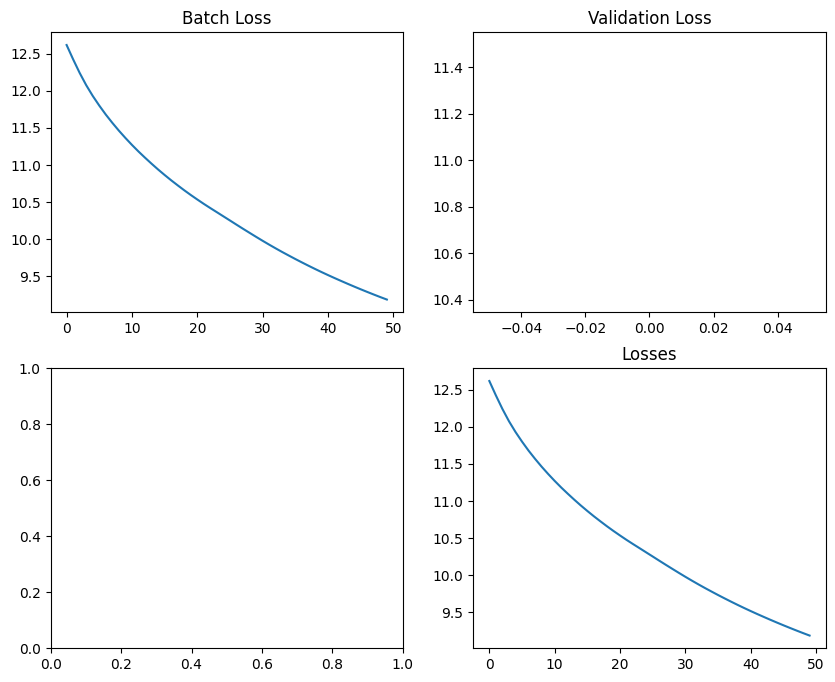

In [71]:
DIMS_OF_PLOT = (2, 2)  # Y, X
SIZE_OF_PLOT = (4, 5)  # Y, X
fig, ax = plt.subplots(DIMS_OF_PLOT[0],
                       DIMS_OF_PLOT[1],
                       figsize=(DIMS_OF_PLOT[1] * SIZE_OF_PLOT[1], DIMS_OF_PLOT[0] * SIZE_OF_PLOT[0]))

ax[0, 0].plot(callback.batch_losses)
ax[0, 0].title.set_text('Batch Loss')
ax[0, 1].plot(callback.val_losses)
ax[0, 1].title.set_text('Validation Loss')

ax[1, 1].plot(callback.batch_losses)
ax[1, 1].plot(callback.val_losses)
ax[1, 1].title.set_text('Losses')

plt.show()